## **МЕТОДЫ АНАЛИЗА ДАННЫХ И МАШИННОГО ОБУЧЕНИЯ**

### ДОМАШНЕЕ ЗАДАНИЕ №1 : "ПЕРЕБОР ПАРАМЕТРОВ АЛГОРИТМОВ". ЧАСТЬ 1: РАЗВЕДОЧНЫЙ АНАЛИЗ ДАННЫХ

Кожевников Д.А. 



### **Импорт библиотек**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
import yaml

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-notebook')

### **Загрузка и описание данных**

In [55]:
df = pd.read_csv("/home/dmitry/fpmi_data_science/Homework_1/data/row/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**ПЕРЕМЕННЫЕ**: <br>

`age` - Age of the patient (возраст пациента, лет) <br>
`sex` - Sex of the patient (пол пациента) - 0 или 1 <br>
`cp` - Chest pain type (тип боли в груди):
- 0 = Typical Angina (типичная стенокардия),
- 1 = Atypical Angina (атипичная стенокардия),
- 2 = Non-anginal Pain (боль несвязанная со стенокардией),
- 3 = Asymptomatic (бессимптомная) <br>

`trtbps` - Resting blood pressure (in mm Hg) (кровяное давление в состоянии покоя в мм. рт. ст.)<br>
`chol` - Cholestoral in mg/dl fetched via BMI sensor (уровень холестирина в мг/децилитр, определенный с помощью датчика BMI)<br>
`fbs` - Fasting blood sugar > 120 mg/dl (уровень сахара в крови натощак):
- 1 = True, 
- 0 = False <br>

`restecg` - Resting electrocardiographic results (результаты электрокардиографии в состоянии покоя):
- 0 = Normal (обычная),
- 1 = ST-T wave normality (нормальность волны ST-T),
- 2 = Left ventricular hypertrophy (гипертрофия левого желудочка)<br>

`thalachh` - Maximum heart rate achieved (Максимальная достигнутая частота сердечных сокращений)<br>
`oldpeak` - Previous peak (предыдущий пик)<br>
`slp` - Slope (наклон)<br>
`caa` - Number of major vessels (количество крупных сосудов)<br>
`thall` - Thalium Stress Test result (результаты стресс-теста на таллий) ~ (0,3)<br>
`exng` - Exercise induced angina:
- 1 = Yes, 
- 0 = No <br>

`output` - Target variable (целевая переменная):<br>
- 0 = less chance of heart attack,
- 1 = more chance of heart attack.

### **Подготовка данных**

In [3]:
# Типы данных переменных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Как видно из результатов, пропущенные данные отсутствуют. Типы данных соответствуют природе переменных. Таким образом, дополнительных преобразований не требуется. Проверим наличие дупликатов в данных.

In [4]:
# Наличие дупликатов строк
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Как видно из результатов, в данных присутствует одна дублирующая строка. Удалим ее и проверим итоговый размер таблицы.

In [5]:
# Удалим дупликаты
print(f'До преобразования: количество строк = {df.shape[0]}, количество столбцов = {df.shape[1]}')
df.drop_duplicates(inplace=True)
print(f'После преобразования: количество строк = {df.shape[0]}, количество столбцов = {df.shape[1]}')

До преобразования: количество строк = 303, количество столбцов = 14
После преобразования: количество строк = 302, количество столбцов = 14


Сохраним обработанные данные в отдельную таблицу:

In [6]:
df.to_csv('./data/intermediate/heart.csv')

### **Разведочный анализ данных**

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Построем коррелограмму для всех данных:

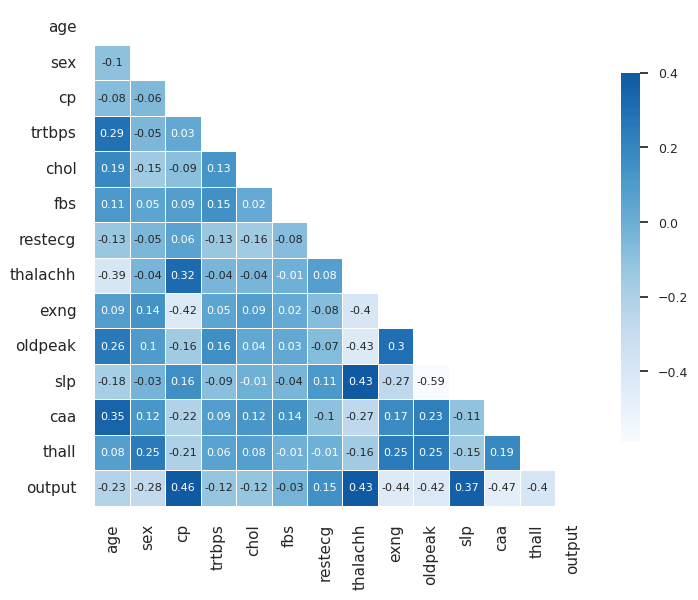

In [7]:
plt.figure(figsize=(8, 8))
sns.set_theme(style="white")
corr_matrix=df.corr(method='spearman').round(2)
mask=np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr_matrix, mask=mask, annot=True, square=True, vmax=.4, cmap='Blues', center=0, cbar_kws={"shrink": .6}, annot_kws={"size":8}, linewidths=0.5)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=9)
plt.show()

Из диагарммы видно, что присутствует ряд признаков, которые имеют монотонную взаимосвязь с целевой переменной: тип боли в груди `cp`, максимальная частота сердечных сокращений `thalachh`, наличие стенокардии под нагрузкой (`exng`),  предыдущий пик (`oldpeak`), количество крупных сосудов (`caa`), стресс-тест на таллий (thall) и наклон (`slope`). <br>
Рассмотрим целевую переменную `output`, которая классифицирует пациентов по риску получения сердечного приступа (0 - низкий риск, 1 - высокий риск).

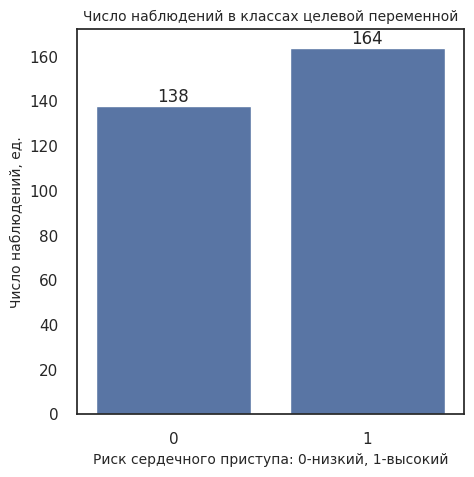

In [8]:
plt.figure(figsize=(5, 5))
ax = sns.barplot(df['output'].value_counts())
ax.bar_label(ax.containers[0])
ax.set_title('Число наблюдений в классах целевой переменной', fontsize=10)
ax.set_xlabel('Риск сердечного приступа: 0-низкий, 1-высокий', fontsize=10)
ax.set_ylabel('Число наблюдений, ед.', fontsize=10);

Как видно из графика, выборка по целевому признаку несбалансированная. Количество наблюдений в классе `1` на `~19 %` больше, чем в классе `0`. Далее рассмотрим распределение числовых признаков в зависимости от класса целевой переменной `output` и переменной пола `sex` одновременно .

In [1]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_gridspec(3, 2)

ax0 = fig.add_subplot(ax[0, 0])
ax1 = fig.add_subplot(ax[0, 1])
ax2 = fig.add_subplot(ax[1, 0])
ax3 = fig.add_subplot(ax[1, 1])
ax4 = fig.add_subplot(ax[2, 0])
ax5 = fig.add_subplot(ax[2, 1])

fig.suptitle('Распределения числовых признаков в зависимости от риска сердечного приступа и пола пациентов')
sns.violinplot(ax=ax0, data=df, x='output', y='age', hue='sex', inner='quartile', palette='Blues')
ax0.set_title('Возраст пациента', fontsize=10)
ax0.set_xlabel('')
ax0.set_ylabel('Лет', fontsize=10)
sns.violinplot(ax=ax1, data=df, x='output', y='trtbps', hue='sex', inner='quartile', palette='coolwarm')
ax1.set_title('Кровяное давление в состоянии покоя', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('Давление, мм.рт.ст')
sns.violinplot(ax=ax2, data=df, x='output', y='chol', hue='sex', inner='quartile', palette='coolwarm')
ax2.set_title('Уровень холестирина', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('мг/дц')
sns.violinplot(ax=ax3, data=df, x='output', y='thalachh', hue='sex', inner='quartile', palette='coolwarm');
ax3.set_title('Максимальная частота сердечных сокращений', fontsize=10)
ax3.set_xlabel('')
ax3.set_ylabel('число сокращений / мин.')
sns.violinplot(ax=ax4, data=df, x='output', y='oldpeak', hue='sex', inner='quartile', palette='coolwarm');
ax4.set_title('Предыдущий пик', fontsize=10)
ax4.set_xlabel('')
ax4.set_ylabel('Высота')
sns.violinplot(ax=ax5, data=df, x='output', y='caa', hue='sex', inner='quartile', palette='coolwarm');
ax5.set_title('Количество крупных сосудов', fontsize=10)
ax5.set_xlabel('')
ax5.set_ylabel('ед.')
plt.show()

NameError: name 'plt' is not defined

Как видно из диаграммы, распределения таких числовых признаков, как возраст пациента, кровяное давление в состоянии покая и уровень холестерина близкии между группами пацинтов с минимальным (0) и высоким (1) риском сердечного приступа, что также подтверждается результатами анализа ранговых корреляций между признаками и целевой переменной. Однако для остальных признаков наблюдаются отличия в распределениях, что также согласуется с результатами корреляционного анализа. Следует отметить, что пол незначительно влияет на риск сердечного приступа.<br>
Для категориальных признаков виализируем таблицы сопряженности. Так как многие классы несбалансированы, нормализуем таблицу сопряженности по строкам.

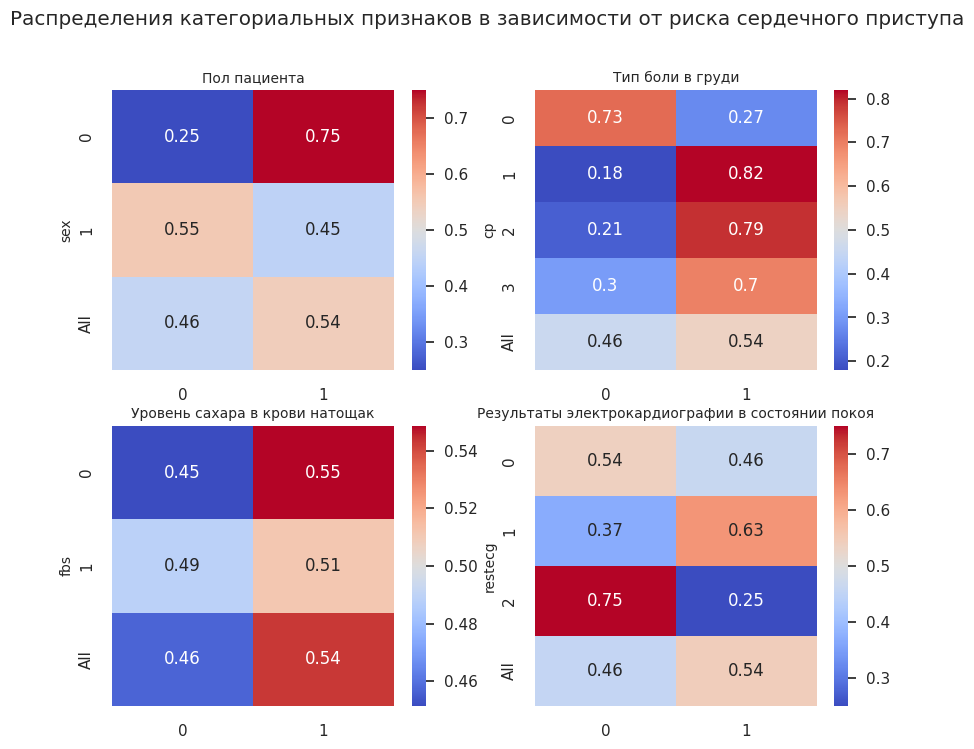

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_gridspec(2, 2)
ax0 = fig.add_subplot(ax[0, 0])
ax1 = fig.add_subplot(ax[0, 1])
ax2 = fig.add_subplot(ax[1, 0])
ax3 = fig.add_subplot(ax[1, 1])

fig.suptitle('Распределения категориальных признаков в зависимости от риска сердечного приступа')
sns.heatmap(ax=ax0, data=pd.crosstab(df['sex'], df['output'], normalize='index', margins=True), cmap='coolwarm',annot=True)
ax0.set_title('Пол пациента', fontsize=10)
ax0.set_xlabel('')
ax0.set_ylabel('sex', fontsize=10)
sns.heatmap(ax=ax1, data=pd.crosstab(df['cp'], df['output'], normalize='index', margins=True), cmap='coolwarm', annot=True)
ax1.set_title('Тип боли в груди', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('cp', fontsize=10)
sns.heatmap(ax=ax2, data=pd.crosstab(df['fbs'], df['output'], normalize='index', margins=True), cmap='coolwarm', annot=True)
ax2.set_title('Уровень сахара в крови натощак', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('fbs', fontsize=10)
sns.heatmap(ax=ax3, data=pd.crosstab(df['restecg'], df['output'], normalize='index', margins=True), cmap='coolwarm', annot=True)
ax3.set_title('Результаты электрокардиографии в состоянии покоя', fontsize=10)
ax3.set_xlabel('')
ax3.set_ylabel('restecg', fontsize=10)
plt.show()

1. Из диаграммы сопряженности для пола и целевого признака видно, что для пола класса `0` риск сердечного приступа выше, чем для класса `1` - 75 % представителей класса `0` имели высокий риск получения приступа. 
2. Из диаграммы сопряженности для типа боли в груди `cp` и целевого признака видно, что пациенты с типами боли `1`, `2` и `3` имели высокий риск получения сердечного приступа, в то время как для типа `0` доля пациентов с минимальным риском существенно преобладала. 
3. Из диаграммы сопряженности для уровня сахара `fbs` и целевого признака можно сделать вывод, что уровень сахара в крови незначительно влияет на риск сердечного приступа. Данное взаимосвязсь прослеживается и в корреляционной диаграмме. 
4. Из диаграммы сопряженности для результатов ЭКГ в состоянии покая и целевого признака можно заключить, что доли пациентов для класса `0` переменной `restecg` распределенны равномерно по риску сердечного приступа, однако для классов `1` и `2` видна положительная и отрицательная взаимосвязь соответственно.<br>
Проверим, полученные выводы проведением теста Хи_2.

In [38]:
def chi2_contingency_test(data: pd.DataFrame, target: str, *args) -> None:
    for item in args:
        result = chi2_contingency(pd.crosstab(data[item], data[target]))
        print(f'Оценка независимости переменных {item} и {target}: статистика - {round(result.statistic, 2)}, p-value - {result.pvalue}')

In [39]:
chi2_contingency_test(df, 'output', 'sex', 'cp', 'fbs', 'restecg')

Оценка независимости переменных sex и output: статистика - 23.08, p-value - 1.5508552054949547e-06
Оценка независимости переменных cp и output: статистика - 80.98, p-value - 1.8926838351935918e-17
Оценка независимости переменных fbs и output: статистика - 0.09, p-value - 0.7611374700928197
Оценка независимости переменных restecg и output: статистика - 9.73, p-value - 0.007713053269318974


Таким образом, проведенные тесты подтвердили, что переменные `sex`, `cp`, `restecg` c `output` не являются назависимыми.

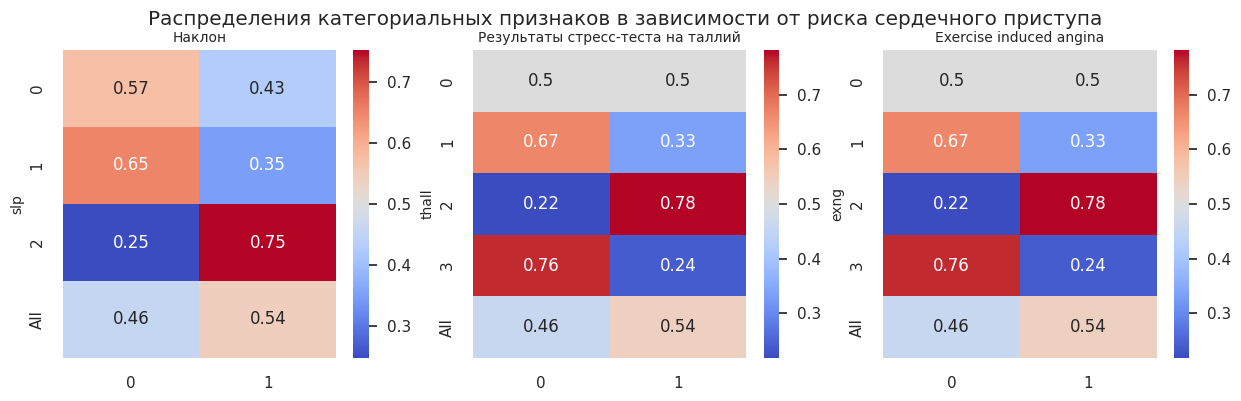

In [164]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_gridspec(1, 3)
ax0 = fig.add_subplot(ax[0, 0])
ax1 = fig.add_subplot(ax[0, 1])
ax2 = fig.add_subplot(ax[0, 2])
fig.suptitle('Распределения категориальных признаков в зависимости от риска сердечного приступа')

sns.heatmap(ax=ax0, data=pd.crosstab(df['slp'], df['output'], normalize='index', margins=True), cmap='coolwarm', annot=True)
ax0.set_title('Наклон', fontsize=10)
ax0.set_xlabel('')
ax0.set_ylabel('slp', fontsize=10)
sns.heatmap(ax=ax1, data=pd.crosstab(df['thall'], df['output'], normalize='index', margins=True), cmap='coolwarm', annot=True)
ax1.set_title('Результаты стресс-теста на таллий', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('thall', fontsize=10)
sns.heatmap(ax=ax2, data=pd.crosstab(df['thall'], df['output'], normalize='index', margins=True), cmap='coolwarm', annot=True)
ax2.set_title('Exercise induced angina', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('exng', fontsize=10)
plt.show()

5. Из диаграммы сопряженности для наклона `slp` и целевого признака видно, что для наклона класса `2` доля пациентов с высоким риском сердечного приступа значительно больше, чем с низким риском, что свидетельствует о возможной взаимосвязи. 
6. Из диаграммы сопряженности для результатов теста на таллий `thall` и целевого признака видно, что возможна взаимосвязь между данными признаками, т.к. распределение пациентов для классов `1`, `2` и `3` по классам риска сердечного приступа неравномерны. 
7. Из диаграммы сопряженности для `Exercise induced andina` и целевого признака можно сделать вывод, что данные переменные также возможно имеют взаимосвязь.<br>
Также проведем тест Хи_2 для указанных комбинаций переменных.

In [40]:
chi2_contingency_test(df, 'output', 'slp', 'thall', 'exng')

Оценка независимости переменных slp и output: статистика - 46.89, p-value - 6.577782760917924e-11
Оценка независимости переменных thall и output: статистика - 84.61, p-value - 3.146295138318122e-18
Оценка независимости переменных exng и output: статистика - 55.46, p-value - 9.556466486179178e-14


Как видно из результатов, нулевая гипотеза о независимости указанных переменных от переменной `output` отклоняется и подтверждаются выводы по анализу тепловых карт, построенных по таблицах сопряженности.